# Identify start - end attack

## Keypoints loading

In [11]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive


%matplotlib inline

In [19]:
df = pd.read_csv('../data/Kaggle/ClipDescriptorKaggle.csv')

In [20]:
df.head()

id          ClipName                                          URL  \
0   1  0001_002_00_01_1  https://www.youtube.com/watch?v=uho2ldovj7o   
1   2  0001_002_00_02_1  https://www.youtube.com/watch?v=uho2ldovj7o   
2   3  0001_002_01_01_1  https://www.youtube.com/watch?v=uho2ldovj7o   
3   4  0001_002_01_02_1  https://www.youtube.com/watch?v=uho2ldovj7o   
4   5  0001_002_02_02_1  https://www.youtube.com/watch?v=uho2ldovj7o   

   Start_frame  End_frame  Light1  Light2 Hit_label  
0      22750.0    22825.0       2       2     0-0-1  
1      24684.0    24759.0       2       2     1-0-0  
2      27330.0    27405.0       2       1     1-0-0  
3      28051.0    28126.0       2       2     0-0-1  
4      34040.0    34115.0       2       2     0-0-1

In [21]:
print("{} different clips".format(len(df.ClipName.unique())))

9370 different clips


In [70]:
def load_key_point(path):
    with open(path, 'r') as fh:
        df_kp = json.load(fh)
    res = [np.array(el) for el in df_kp]
    return [el for el in res] #  if el.ndim == 3

df_kp = load_key_point('../data/Kaggle/FencersKeyPoints/0006_028_00_04_1.json')

## Load video clip

(-0.5, 639.5, 359.5, -0.5)

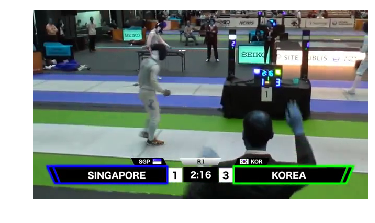

In [64]:
import cv2

cap = cv2.VideoCapture('../data/video.mp4')

# Get total number of frames
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

def get_frame_from_video(frame_number):
    # Check for valid frame number
    if frame_number >= 0 & frame_number <= total_frames:
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    ret, frame = cap.read()
    return frame

frame = get_frame_from_video(22850)
plt.imshow(frame)
plt.axis("off")

## Visualize

In [71]:
def plot_key_points(X, ax):
    mask = X[0].mean(axis=1) > 1
    ax.plot(X[0][mask, 0], X[0][mask, 1], 'ro')
    mask = X[1].mean(axis=1) > 1
    ax.plot(X[1][mask, 0], X[1][mask, 1], 'bo')
    ax.set_ylim(230, 0)
    
def plot_key_point_sequence(idx):
    fig, ax = plt.subplots()
    plot_key_points(df_kp[int(idx)], ax)
    plt.show()


interactive_plot = interactive(plot_key_point_sequence, idx=(0, len(df_kp)-1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=37, description='idx', max=74), Output(layout=Layout(height='350px'))), …

## Display all images of same clip

In [89]:
def plot_key_points(X, ax):
    mask = X[0].mean(axis=1) > 1
    ax.plot(X[0][mask, 0], X[0][mask, 1], 'ro')
    mask = X[1].mean(axis=1) > 1
    ax.plot(X[1][mask, 0], X[1][mask, 1], 'bo')
    ax.set_ylim(230, 0)


def plot_all_from_clip(df_kp, start, axs):
    idx = 0
    for row in range(N_row):
        for col in range(N_col):
            ax = axs[row][col]
            try:
                ax.imshow(get_frame_from_video(int(start + idx)))
                plot_key_points(df_kp[idx], ax)
                ax.set_aspect("equal")
                ax.set_title(str(idx), loc="center")
                #ax.set_axis("off")
            except Exception as e:
                print(e)
                pass
            idx += 1

0001_002_00_01_1
22750.0
22825.0
'list' object has no attribute 'mean'
'list' object has no attribute 'mean'
'list' object has no attribute 'mean'
'list' object has no attribute 'mean'


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


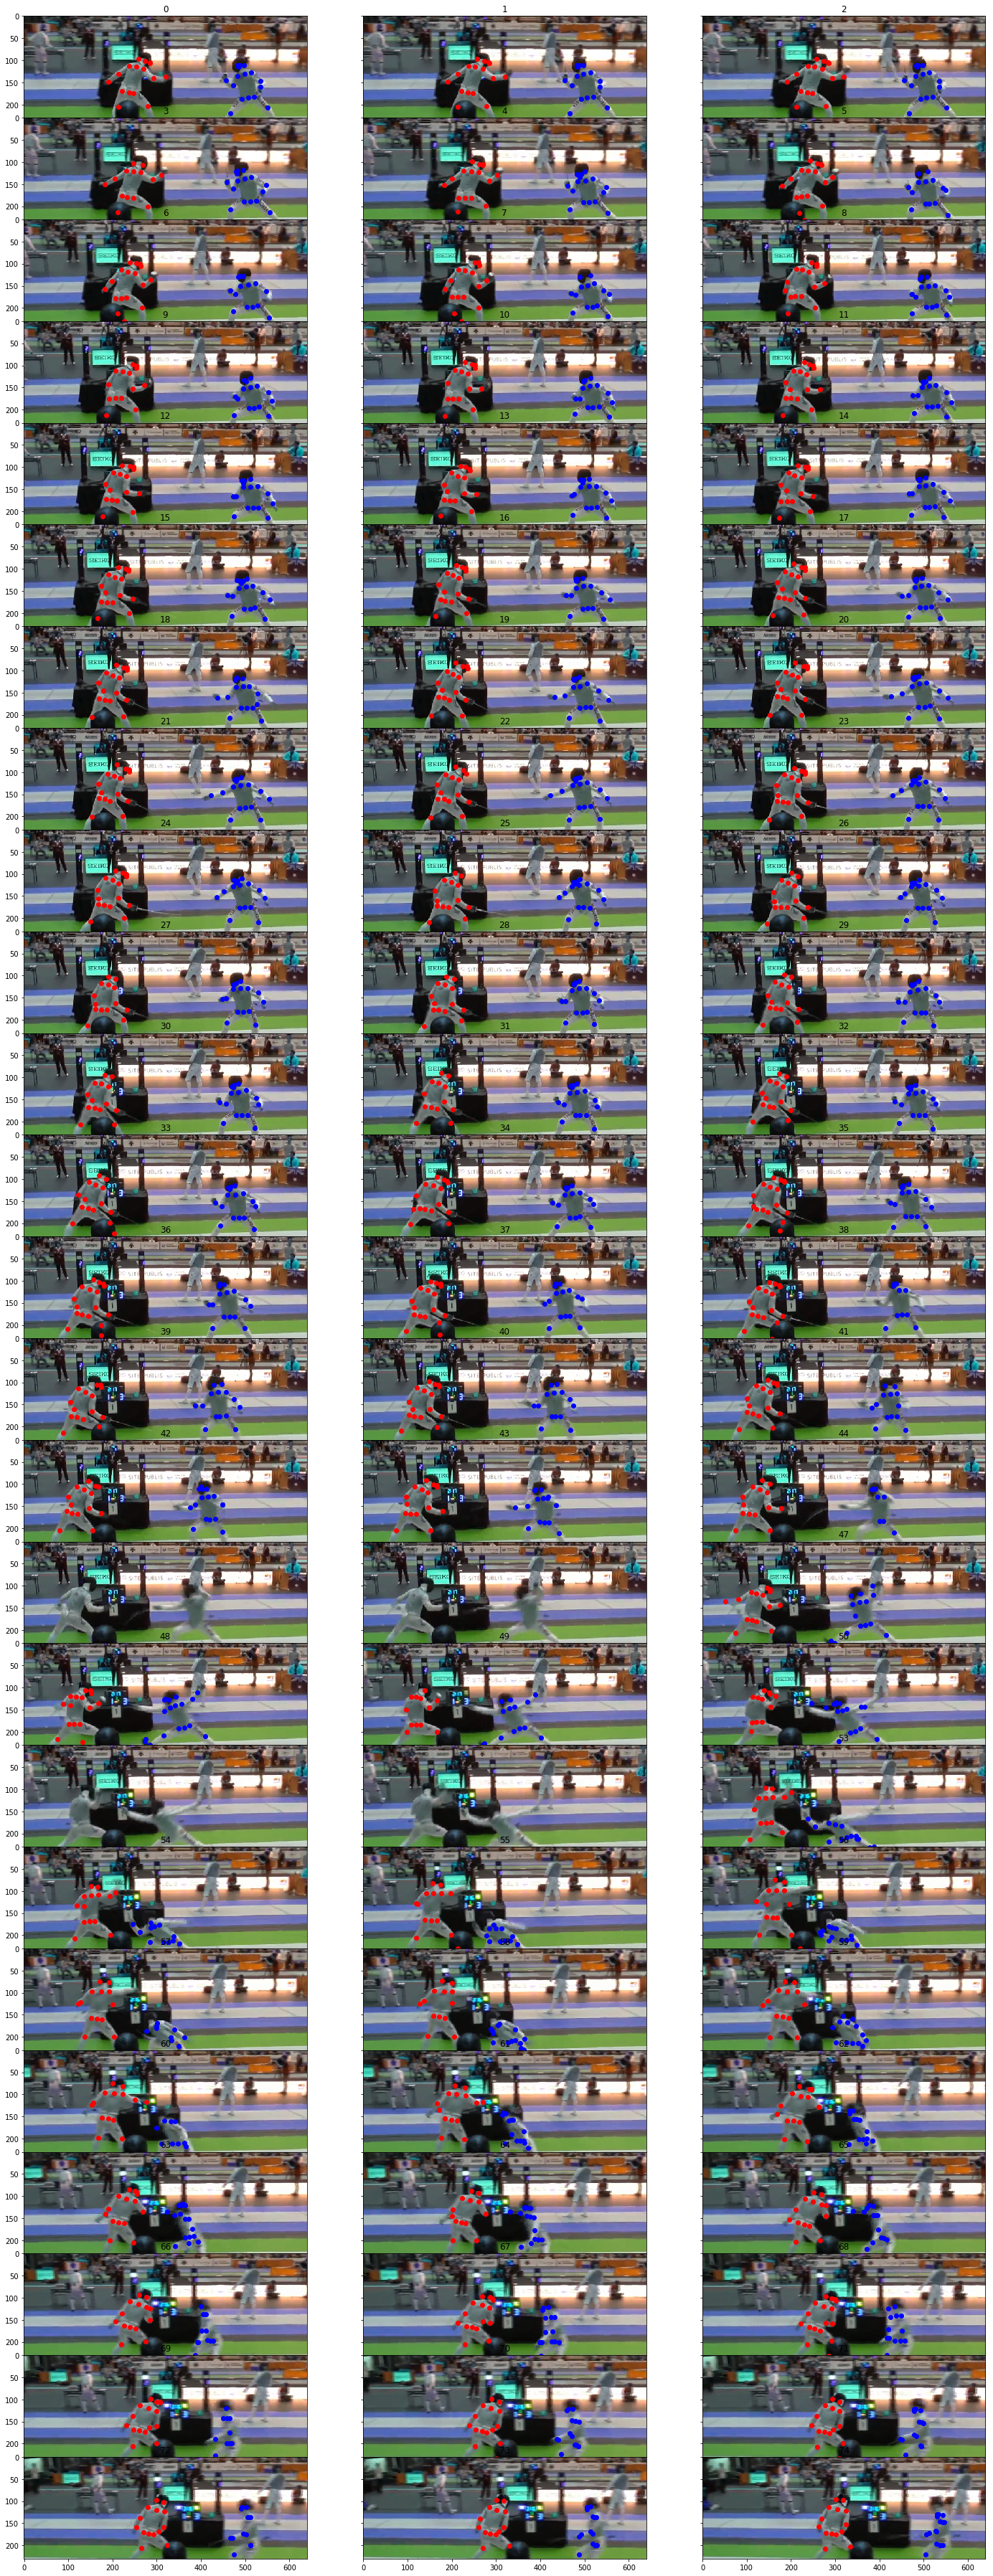

In [ ]:
N_col = 3
N_row = 25
    
for clipname in df.ClipName.unique():
    print(clipname)
    
    start = df[df.ClipName == clipname]["Start_frame"].values[0]
    end = df[df.ClipName == clipname]["End_frame"].values[0]
    print(start)
    print(end)
    
    df_kp = load_key_point('../data/Kaggle/FencersKeyPoints/{}.json'.format(clipname))
    
    f, axs = plt.subplots(N_row, N_col, sharex='col', sharey='row',
                          gridspec_kw={'hspace': 0, 'wspace': 0},
                          constrained_layout=True)
    
    f.set_figwidth(20)
    f.set_figheight(50)
    
    plot_all_from_clip(df_kp, start, axs)
    plt.tight_layout()
    plt.show()
    
    start = input("idx of start attack ?")
    end = input("idx of end attack ?")
    who = input("who initiates attack ? (left or right)")
    df[df.ClipName == clipname]["start"] = int(start)
    df[df.ClipName == clipname]["end"] = int(end)
    df[df.ClipName == clipname]["who"] = who.lower()

In [ ]:
# 1ere a corriger : 44 au lieu de 49'